In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten,Input,Reshape

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')/255

x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test),28,28,1))

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor*np.random.normal(loc = 0.0,scale = 1.0,size = x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc = 0.0,scale = 1.0,size = x_test.shape)

In [5]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

In [6]:
input_img = Input(shape = (28,28,1))

In [7]:
x = Flatten()(input_img)
x = Dense(128,activation = 'relu')(x)
encoded = Dense(64,activation = 'relu')(x)

In [8]:
x = Dense(128,activation = 'relu')(encoded)
x = Dense(28*28,activation = 'sigmoid')(x)
decoded = Reshape((28,28,1))(x)

In [9]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer = 'adam',loss = 'binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = autoencoder.fit(x_train_noisy,x_train,epochs = 10,batch_size = 128,shuffle = True,validation_data = (x_test_noisy,x_test),verbose = 1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.2772 - val_loss: -68.8862
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1528 - val_loss: -98.8649
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1367 - val_loss: -114.2338
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1303 - val_loss: -118.3379
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.1259 - val_loss: -129.3561
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1228 - val_loss: -134.1792
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.1205 - val_loss: -138.1977
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.1184 - val_loss: -145.9108
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.1168 - val_loss: -152.6638
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1156 - val_loss: -150.4062


In [11]:
denoised_img = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


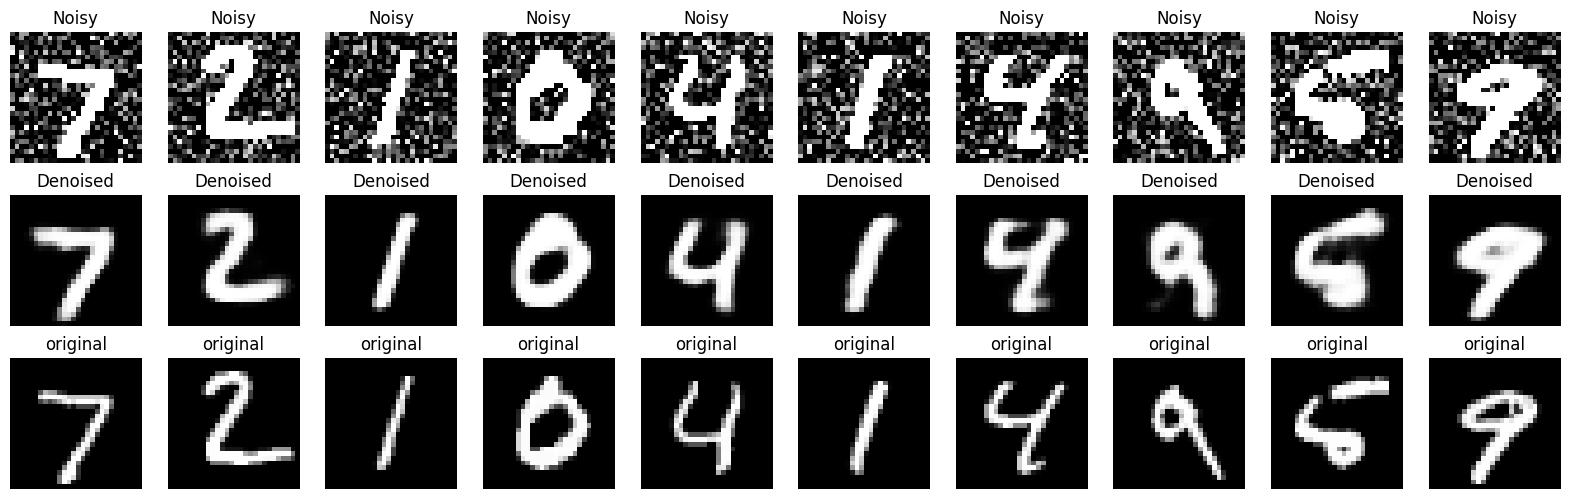

In [12]:
plt.figure(figsize = (20,6))
for i in range(10):
    ax = plt.subplot(3,10,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28),cmap = 'gray')
    ax.set_title("Noisy")
    ax.axis('off')

    ax = plt.subplot(3,10,i+1+10)
    plt.imshow(denoised_img[i].reshape(28,28),cmap = 'gray')
    ax.set_title("Denoised")
    ax.axis('off')

    ax = plt.subplot(3,10,i+1+20)
    plt.imshow(x_test[i].reshape(28,28),cmap = 'gray')
    ax.set_title("original")
    ax.axis('off')


plt.show()